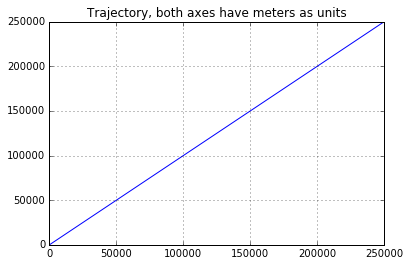

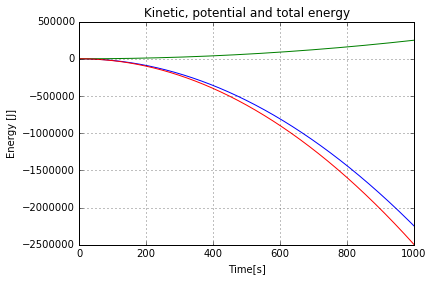

In [18]:
#Non funziona bisogna capire come sono le forze... forse conviene farlo prima con Eulero

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline                           


l = 1 #lenght of the pendulum
m = 1 #mass of the pendulum
g = -10 #gravitational acceleration

theta = [0.1] #initial value of theta

t = [0]
Dt = 0.01

x = [l*sin(theta[0])]
y = [l*cos(theta[0])]

vx = [0]
vy = [0]

v = [sqrt(vx[0]**2+vy[0]**2)]

K = [0.5 * m * v[0]**2]             #Initial kinetic, potential and total energy
U = [m*y[0]*g]
E = [K[0]+U[0]]

ax = [m*sin(theta[0])*sin(theta[0])]           
ay = [m*sin(theta[0])*cos(theta[0])]

for i in range (1, 100000):           #Start the cycle, the true hart of the algorithm
        
        x.append(x[i-1] + vx[i-1] * Dt + 0.5 * ax[i-1] * Dt**2)
        y.append(y[i-1] + vy[i-1] * Dt + 0.5 * ay[i-1] * Dt**2)           #Compute positon at the i-th step
        
        theta.append(arctan(y[i]/x[i]))
        
        ax.append(m*sin(theta[i])*sin(theta[i]))                                      #Compute acceleration at the i-th step
        ay.append(m*sin(theta[i])*cos(theta[i]))
        
        vx.append(vx[i-1] + 0.5 * (ax[i-1] + ax[i]) * Dt)
        vy.append(vy[i-1] + 0.5 * (ay[i-1] + ay[i]) * Dt)                 #Compute velocity at the i-th step
        
        v.append(sqrt(vx[i]**2+vy[i]**2))
        
        K.append(0.5 * m * v[i]**2)
        U.append(m*y[i]*g)                                   #Compute energy (divided bi the come mass) at the i-th step
        E.append(U[i] + K[i])
        
        t.append(t[i-1] + Dt)

figure()                        #Plots the trajectory of the planets                                    
plot(x, y)
title("Trajectory, both axes have meters as units") 
grid()

    
figure()                       #Plots energy as a function of time
plot(t, E)
plot(t, K)
plot(t, U)
title("Kinetic, potential and total energy")
xlabel("Time[s]")
ylabel("Energy [J]")
grid()

show()